##Alumno: Brian Alex Fuentes Acuña.
##Padrón: 101785.

## Clase 9: Gramianos de controlabilidad y observabilidad

Los tests de controlabilidad y observabilidad nos alcanzan para confirmar si un sistema es controlable y observable. Sin embargo, no nos indican qué tan fácil es controlar u observar el sistema. Para esto podemos utilizar los gramianos, y para más adelante tener como herramienta para establecer reducciones de órden de modelos con ese criterio.

Dado un sistema LTI MIMO tal que:

$$ \dot{x} = A x + B u $$

El gramiano de controlabilidad es:

$$ G_C(t_0, t_1) = \int_{t_0}^{t_1} e^{A\left(t_0 - \tau\right)}B B^T e^{A^T \left(t_0 - \tau\right)} d\tau$$ 

Que es una matriz simétrica y semidefinida positiva. Decimos que:

El sistema dado es controlable en el intervalo $[t_0, t_1]$ si y solo si:

$$ |G_C(t_0, t_1)| \neq 0  \, \forall t \in [t_0, t_1]$$ 

Si este sistema tiene ecuación de salida dada por:

$$ y = C x + D u $$

El gramiano de observabilidad es:

$$ G_O(t_0, t_1) = \int_{t_0}^{t_1} e^{A^T \left(\tau - t_0\right)}C^T C e^{A\left(\tau - t_0\right)} d\tau$$ 

Que es una matriz simétrica y semidefinida positiva. Decimos que:

El sistema dado es observable en el intervalo $[t_0, t_1]$ si y solo si:

$$ |G_O(t_0, t_1)| \neq 0  \, \forall t \in [t_0, t_1]$$ 

Volvamos al ejercicio resuelto la clase pasada y repitamos aplicando el gramiano de controlabilidad:

**Ejercicio 7:**

<figure>
<center>
<img src='https://drive.google.com/uc?id=1AWb_mm--HrIPDPQ-4vGigO235uCuOYxG'/>
<figcaption> Ejercicio 7 </figcaption></center>
</figure>

Su ecuación de estado era:

$$ \begin{bmatrix}\dot{v_1} \\ \dot{v_2} \end{bmatrix} = \begin{bmatrix}-\frac{1}{R_1 C_1} & 0 \\ 0 & -\frac{1}{R_2 C_2} \end{bmatrix}\begin{bmatrix}v_1 \\ v_2 \end{bmatrix}+ \begin{bmatrix}\frac{1}{R_1 C_1} \\ \frac{1}{R_2 C_2} \end{bmatrix} v(t) $$

y la de salida:

$$ y = \begin{bmatrix}1 & 1\end{bmatrix} \begin{bmatrix}v_1 \\ v_2 \end{bmatrix}$$ 

Tomemos algunos valores numéricos para particularizar el cálculo:

* $R_1 = 950\Omega$  
* $R_2 = 1{,}05~\text{k}\Omega$  
* $C_1 = 1{,}1~\mu\text{F}$  
* $C_2 = 1~\mu\text{F}$

Dado que $t_0 = 0$ s y $t_1 = t$, el gramiano de controlabilidad queda:

$$ G_C(t) = \int_0^t e^{-A\tau}B B^T e^{-A^T\tau} d\tau$$ 

Empezamos utizando el test de controlabilidad que ya conocemos:

In [ ]:
!pip install slycot
!pip install control==0.8.4 # Some functions not working with 0.9.0
import numpy as np
import control as ctrl
import scipy as sp
import sympy as symb
import matplotlib.pyplot as plt

R1 = 950
R2 = 1050
C1 = 1.1e-6
C2 = 1e-6
A = np.array([[-1/R1/C1, 0], [0, -1/R2/C2]])
B = np.array([[1/R1/C1], [1/R2/C2]])
C = np.array([1, 1])
D = 0
t_final = 0.01

sys = ctrl.StateSpace(A, B, C, D)

P = ctrl.ctrb(A, B)
print('\n P =')
print(P)

print('El rango de P es', np.linalg.matrix_rank(P), 'entonces es controlable')


Nos dice que el sistema es controlable. Evaluemos ahora el gramiano de controlabilidad para $t_1 = 0{,}01$.

La cuenta da:

$$ G_C(t) = \begin{bmatrix}\frac{e^{\left(\frac{2 t}{R_1 C_1} \right)} - 1}{2 R_1 C_1} & \frac{e^{\left[t \left(\frac{1}{R_1 C_1}+\frac{1}{R_2 C_2}\right)\right]} - 1}{R_1 C_1 + R_2 C_2} \\ \frac{e^{\left[t \left(\frac{1}{R_1 C_1}+\frac{1}{R_2 C_2}\right)\right]} - 1}{R_1 C_1 + R_2 C_2} & \frac{e^{\left(\frac{2 t}{R_2 C_2}\right)} - 1}{2 R_2 C_2} \end{bmatrix} $$

**Ejercicio** Llegar a la expresión anterior a partir de la integral dada y la definición del sistema.

**RTA:**

$$
BB^T=
\begin{bmatrix}
\frac{1}{R_1^2C_1^2} & \frac{1}{R_1C_1R_2C_2}\\
\frac{1}{R_1C_1R_2C_2} & \frac{1}{R_2^2C_2^2}
\end{bmatrix}
$$
<!---->
$$\tau= t_0 - t$$
$$
G_C(t_1)=
\int_{t_0}^{t_1}
\begin{bmatrix}
e^{\frac{-\tau}{R_1C_1}}&0\\
0&e^{\frac{-\tau}{R_2C_2}}
\end{bmatrix}
\begin{bmatrix}
\frac{1}{R_1^2C_1^2} & \frac{1}{R_1C_1R_2C_2}\\
\frac{1}{R_1C_1R_2C_2} & \frac{1}{R_2^2C_2^2}
\end{bmatrix}
\begin{bmatrix}
e^{\frac{-\tau}{R_1C_1}}&0\\
0&e^{\frac{-\tau}{R_2C_2}}
\end{bmatrix}
d\tau
$$

$$=
\int_{t_0}^{t_1}
\begin{bmatrix}
\frac{e^{\frac{-\tau}{R_1C_1}}}{R_1^2C_1^2} & \frac{e^{\frac{-\tau}{R_1C_1}}}{R_1C_1R_2C_2}\\
\frac{e^{\frac{-\tau}{R_2C_2}}}{R_1C_1R_2C_2} & \frac{e^{\frac{-\tau}{R_2C_2}}}{R_2^2C_2^2} 
\end{bmatrix}
\begin{bmatrix}
e^{\frac{-\tau}{R_1C_1}}&0\\
0&e^{\frac{-\tau}{R_2C_2}}
\end{bmatrix}
d\tau
$$

$$=
\int_{t_0= 0}^{t_1= t_1}
\begin{bmatrix}
\frac{e^{\frac{-2\tau}{R_1C_1}}}{R_1^2C_1^2} & \frac{e^{\frac{-\tau}{R_1C_1} + \frac{-\tau}{R_2C_2}}}{R_1C_1 + R_2C_2}\\
\frac{e^{\frac{-\tau}{R_1C_1} + \frac{-\tau}{R_2C_2}}}{R_1C_1R_2C_2}  & \frac{e^{\frac{-2\tau}{R_2C_2}}}{R_2^2C_2^2}
\end{bmatrix}
d\tau
$$
Finalmente queda reemplazando el $\tau$ y los $t_1$ y $t_0$:
$$
G_C(t_1)=
\begin{bmatrix}
\frac{e^{\frac{2t_1}{R_1C_1}} - 1}{2R_1C_1} & \frac{e^{t_1(\frac{1}{R_1C_1} + \frac{1}{R_2C_2})} - 1}{R_1C_1 + R_2C_2}\\
\frac{e^{t_1(\frac{1}{R_1C_1} + \frac{1}{R_2C_2})} - 1}{R_1C_1 + R_2C_2}  & \frac{e^{\frac{2t_1}{R_2C_2}} - 1}{2R_2C_2}
\end{bmatrix}
$$

---
A continuación, evaluamos en $t_1$ en base a la expresión hallada y verificamos que el determinante sea no nulo:

In [ ]:
def mi_gramianoC(t_f): 
  gc11 = (np.exp(2*t_f/(R1*C1))-1)/(2*R1*C1)
  gc22 = (np.exp(2*t_final/(R2*C2))-1)/(2*R2*C2)
  gc12 = (np.exp(t_f*(1/(R1*C1)+1/(R2*C2)))-1)/(R1*C1+R2*C2)
  gc21 = gc12
  Gc = np.matrix([[gc11, gc12],[gc21, gc22]])
  print('El determinante de Gc es')
  print(np.linalg.det(Gc))
  return Gc

Gc= mi_gramianoC(t_final)

El determinante de Gc es
4.9812405978168744e+16


De la demostración de condición de suficiencia del teorema para el test de controlabilidad con gramiano, se propone una entrada u(t) que nos permite llevar al estado de $x_0 = x(t_0)$ a $x_1 = x(t_1) = 0$ cuyo valor es:

$$ u(t) = -B^T e^{A^T (t_0 - t)} G_C^{-1}(t_0, t_1) x_0 $$

Calculemos entonces para nuestro circuito, cuál es la entrada que nos permite llevar de:

* $v_1(0) = 10$ V, 
* $v_2(0) = -3$ V 

a 

* $v_1(0{,}01) = 0$ V, 
* $v_2(0,01) = 0$ V.

Es decir:

$$ u(t) = -B^T e^{-t A^T} G_C^{-1}(0, 0.01) \begin{bmatrix} 10\\ -3\end{bmatrix} $$

Simulemos el sistema con dicha entrada para validar que cumple el objetivo propuesto.

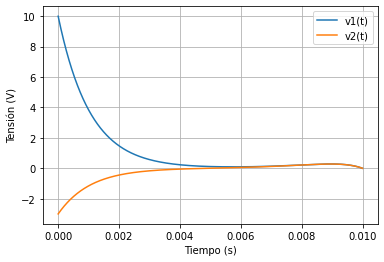

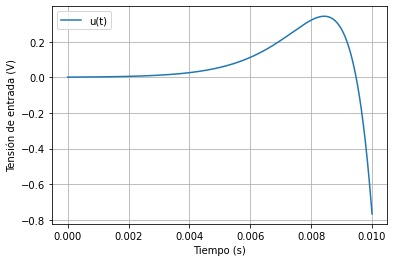

In [ ]:
x0 = np.array([[10], [-3]])

def u_to_origin(tiempo, Gc):
    u = -B.transpose() @ sp.linalg.expm(-tiempo*A) @ np.linalg.inv(Gc) @ x0
    return u.item()

t_inicial = 0
paso_tiempo = t_final/10000  # Ajustar este tiempo
tiempo = np.arange(t_inicial, t_final, paso_tiempo)
u = np.array([u_to_origin(t, Gc) for t in tiempo])

tout, yout, xout = ctrl.forced_response(sys, tiempo, u, X0=[10, -3])

def graficos(t, xvect, u):  
  plt.plot(tout, xvect[0], label='v1(t)')
  plt.plot(tout, xvect[1], label='v2(t)')
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Tensión (V)')
  plt.legend(loc='best')
  plt.grid()
  plt.show()
  plt.figure()
  plt.plot(tout, u, label='u(t)')
  plt.xlabel('Tiempo (s)')
  plt.ylabel('Tensión de entrada (V)')
  plt.legend()
  plt.grid()
  plt.show() 

graficos(tout, xout, u)


Vemos que se logra el objetivo de alcanzar $x = 0$ en el tiempo especificado con la entrada de control calculada.

Podemos utilizar directo la herramienta de simulación para calcular un gramiano del sistema que es equivalente:

In [ ]:
Gc = ctrl.gram(sys, 'c')
print('Gc =')
print(Gc)
print('El determinante de Gc es:')
print(np.linalg.det(Gc))
#El gramiano y por lo tanto su determinante dependen del tiempo especificado
# por lo que el el Gc anterior se usa t1 pero en el Gc provisto por gram()
# no especificamos ningun tiempo, python usa alguna estimacion numerica por lo
# que el gramiano será distinto  y tambien su determinante pero no la conclusion a la que se llega.

Gc =
[[478.46889952 477.32696897]
 [477.32696897 476.19047619]]
El determinante de Gc es:
1.2977958265440566


## Tarea

**Ejercicio 1:**

*1. Repetir las simulaciones del circuito RC para $t_1 = 0.001$ s.*



In [ ]:
#Cambiamos el nuevo tiempo t1.
t_final= 0.001 #[seg]
#Se evalua el gramiado de controlabilidad en t= t_final.
#Para que sea controlable el determinante del gramiano debe ser distinto de cero.
def mi_gramianoC(t_f): 
  gc11 = (np.exp(2*t_f/(R1*C1))-1)/(2*R1*C1)
  gc22 = (np.exp(2*t_final/(R2*C2))-1)/(2*R2*C2)
  gc12 = (np.exp(t_f*(1/(R1*C1)+1/(R2*C2)))-1)/(R1*C1+R2*C2)
  gc21 = gc12
  Gc = np.matrix([[gc11, gc12],[gc21, gc22]])
  print('El determinante de Gc es')
  print(np.linalg.det(Gc))
  return Gc

Gc= mi_gramianoC(t_final)

El determinante de Gc es
10.957920844389497


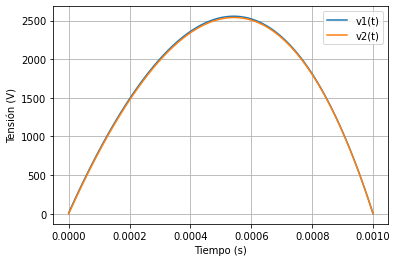

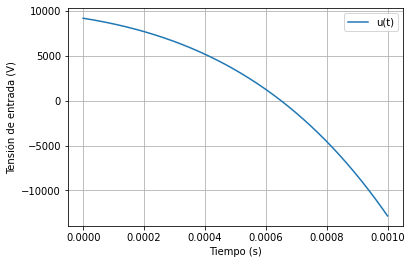

In [ ]:
#Se calcula la entrada para llevar a el estado final esperado.
paso_tiempo = t_final/10000  # Ajustar este tiempo
tiempo = np.arange(t_inicial, t_final, paso_tiempo)
u = np.array([u_to_origin(t,Gc) for t in tiempo])

tout, yout, xout = ctrl.forced_response(sys, tiempo, u, X0=[10, -3])
graficos(tout, xout, u)


In [ ]:
#Se calcula el gramiano del sistema, que es equivalente.
Gc = ctrl.gram(sys, 'c')
print('Gc =')
print(Gc)
print('El determinante de Gc es:')
print(np.linalg.det(Gc))

Gc =
[[478.46889952 477.32696897]
 [477.32696897 476.19047619]]
El determinante de Gc es:
1.2977958265440566


*2. Repetir las simulaciones del circuito RC para $t_1 = 0.1$ s.*



In [ ]:
#Cambiamos el nuevo tiempo t1.
t_final= 0.1 #[seg]
#Se evalua el gramiado de controlabilidad en t= t_final.
#Para que sea controlable el determinante del gramiano debe ser distinto de cero.
Gc= mi_gramianoC(t_final)

El determinante de Gc es
9.005876000515642e+165


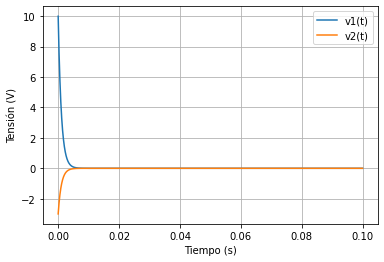

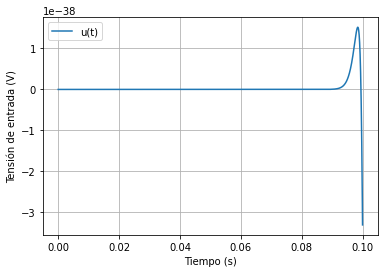

In [ ]:
#Se calcula la entrada para llevar a el estado final esperado.
paso_tiempo = t_final/10000  # Ajustar este tiempo
tiempo = np.arange(t_inicial, t_final, paso_tiempo)
u = np.array([u_to_origin(t,Gc) for t in tiempo])

tout, yout, xout = ctrl.forced_response(sys, tiempo, u, X0=[10, -3])
graficos(tout, xout, u)

In [ ]:
#Se calcula el gramiano del sistema, que es equivalente.
Gc = ctrl.gram(sys, 'c')
print('Gc =')
print(Gc)
print('El determinante de Gc es:')
print(np.linalg.det(Gc))

Gc =
[[478.46889952 477.32696897]
 [477.32696897 476.19047619]]
El determinante de Gc es:
1.2977958265440566


*3. ¿Qué conclusiones podés sacar sobre los puntos 1 y 2? ¿Qué esperarías que pase cuando $t \to \infty$?* 

**RTA:**

Observando las respuesta, a medida que aumenta $t_1$ se puede observar que las amplitudes necesarias, para llevar los estados de $x(t_0)=x_0$ a un $x(t_1)=0$, disminuyen considerablemente.

Eso quiere decir que a menor tiempo t1 mayor será la energía empleada y a mayor tiempo menor será la energía necesaria para llevarlo a $x(t_1)=0$.

Entonces a tiempo $t \to \infty$ se necesita muy poca energía para llevarlo a algún $x(t^*)=0$.

*Nota 1: Se puede observar los determinantes de los gramianos para comprarlos, dado que en los siguientes temas se concluye que la energía de la entrada u(t) necesaria dependerá de la inversa del gramiano, y este a su vez depende del determinante de este. entonces a mayor valor del determinante, menor la energía empleada "es más controlable" y a menor valor de determinante (ósea tendiendo a cero) menos controlable será porque se necesitará más energía*

*Nota 2: Como el gramiano depende del tiempo en la expresión del determinante se puede sacar factor común $e^{t_1}$* y se ve a medida que el tiempo aumenta lo hace el determinante haciendo que la energía necesaria para llegar a $x(t_1)=0$ sea menor.



*4. Calcular el grammiano de observabilidad para $t_1 = 0.01$ s y verificar que es observable. Repetir usando la función gram().*

$$
BB^T=
\begin{bmatrix}
1 & 1\\
1 & 1
\end{bmatrix}
$$
<!---->
$$\tau= t_0 - t$$
$$
G_C(t_1)=
\int_{t_0}^{t_1}
\begin{bmatrix}
e^{\frac{-(t-t_0)}{R_1C_1}}&0\\
0&e^{\frac{-(t-t_0)}{R_2C_2}}
\end{bmatrix}
\begin{bmatrix}
1 & 1\\
1 & 1
\end{bmatrix}
\begin{bmatrix}
e^{\frac{-(t-t_0)}{R_1C_1}}&0\\
0&e^{\frac{-(t-t_0)}{R_2C_2}}
\end{bmatrix}
d\tau
$$

$$=
\int_{t_0}^{t_1}
\begin{bmatrix}
e^{\frac{-(t-t_0)}{R_1C_1}}&e^{\frac{-(t-t_0)}{R_1C_1}}\\
e^{\frac{-(t-t_0)}{R_2C_2}}&e^{\frac{-(t-t_0)}{R_2C_2}}
\end{bmatrix}
\begin{bmatrix}
e^{\frac{-(t-t_0)}{R_1C_1}}&0\\
0&e^{\frac{-(t-t_0)}{R_2C_2}}
\end{bmatrix}
d\tau
$$

$$=
\int_{t_0= 0}^{t_1= t_1}
\begin{bmatrix}
e^{\frac{-2(t-t_0)}{R_1C_1}}&e^{-(t-t_0)(\frac{1}{R_1C_1} + \frac{1}{R_2C_2})}\\
e^{-(t-t_0)(\frac{1}{R_1C_1} + \frac{1}{R_2C_2})}&e^{\frac{-2(t-t_0)}{R_2C_2}}
\end{bmatrix}
d\tau
$$
Finalmente queda:
$$
G_C(t_1)=
\begin{bmatrix}
\frac{-R_1C_1}{2}[e^{\frac{-2t_1}{R_1C_1}} - 1]&\frac{-R_1C_1R_2C_2}{R_1C_1+R_2C_2}[e^{-t_1(\frac{1}{R_1C_1} + \frac{1}{R_2C_2})} - 1]\\
\frac{-R_1C_1R_2C_2}{R_1C_1 + R_2C_2}[e^{-t_1(\frac{1}{R_1C_1} + \frac{1}{R_2C_2})} - 1]&\frac{-R_2C_2}{2}[e^{\frac{-2t_1}{R_2C_2}} - 1]
\end{bmatrix}
$$




In [ ]:
#Miremos el rango de la matriz de observabilidad, si es rango completo es observable
Po = ctrl.obsv(A, C)
print('\n Po =')
print(Po)

print('El rango de P0 es', np.linalg.matrix_rank(Po), 'entonces es observable')


 Po =
[[   1.            1.        ]
 [-956.93779904 -952.38095238]]
El rango de P0 es 2 entonces es observable


In [ ]:
#Miremos el gramiano
t_final= 0.01 #[Seg.]
def mi_gramianoO(t_f): 
  gc11 = (np.exp(-2*t_f/(R1*C1)) - 1) * (-(2*R1*C1)/2)
  gc22 = (np.exp(-2*t_f/(R2*C2)) - 1) * (-(2*R2*C2)/2)
  gc12 = (np.exp(-t_f*(1/(R1*C1) + 1/(R2*C2))) - 1) * (-(R1*C1*R2*C2) / (R1*C1+R2*C2))
  gc21 = gc12
  Go = np.matrix([[gc11, gc12],[gc21, gc22]])
  print('El determinante de Go es')
  print(np.linalg.det(Go))
  return Go

Go= mi_gramianoC(t_final)
print("|Go| no es nulo, entonces es observable")

El determinante de Gc es
4.9812405978168744e+16
|Go| no es nulo, entonces es observable


In [ ]:
#Se calcula el gramiano del sistema, que es equivalente.
Go = ctrl.gram(sys, 'o')
print('Go =')
print(Go)
print('El determinante de G0 es:')
print(np.linalg.det(Go))
print("|Go| no es nulo, entonces es observable")


Go =
[[0.0005225  0.00052375]
 [0.00052375 0.000525  ]]
El determinante de G0 es:
1.5624910999634253e-12
|Go| no es nulo, entonces es observable


**Ejercicio 2:** 

¿Puede detectar si el sistema de las siguientes ecuaciones es controlable u observable sin utilizar el test de controlabilidad y observabilidad? En caso de pérdida de controlabilidad u observabilidad, indique el o los modos que producen esta(s) pérdida(s).

$$
\dot{x}(t)  = \left[\begin{array}{rrrrrrr}
                        2 & 1 & 0 & 0 & 0 & 0 & 0 \\
                        0 & 2 & 0 & 0 & 0 & 0 & 0 \\
                        0 & 0 & 2 & 0 & 0 & 0 & 0 \\
                        0 & 0 & 0 & 2 & 0 & 0 & 0 \\
                        0 & 0 & 0 & 0 & 3 & 1 & 0 \\
                        0 & 0 & 0 & 0 & 0 & 3 & 0 \\
                        0 & 0 & 0 & 0 & 0 & 0 & 3 \\
                   \end{array}\right] x(t) + \left[\begin{array}{rrr}
                                                        2 & 1 & 0 \\
                                                        2 & 1 & 1 \\
                                                        1 & 1 & 1 \\
                                                        3 & 2 & 1 \\
                                                        1 & 0 & 0 \\
                                                        1 & 0 & -1 \\
                                                        -1 & 0 & 1 \\
                                                    \end{array}\right] u(t) 
                                                    \\
y(t) = \left[\begin{array}{rrrrrrr}
                2 & 2 & 1 & 3 & -1 & 1 & 1 \\
                1 & 1 & 1 & 2 & 0 & 0 & 0 \\
                0 & 1 & 1 & 1 & 1 & 1 & 0 \\
               \end{array}\right] x(t)
$$

Analizar primero y luego verificar por computadora.

**RTA:**

Efectivamente la forma de Jordan tiene la ventaja de que se puede ser la controlabilidad y observabilidad por inspección, el análisis será el siguiente:

*Controlabilidad*

Para $\lambda = 2$ se tiene multiplicidad algebraica mayor a la geometrica, no están todos desacoplados, voy a tener que ver que las filas de **B** correspondiente a los autovalores que si desacoplaron totalmente sean filas no nulas y LI. en caso contrario las variables de estado asociadas no serían controlables.
Las filas asociadas al autovalor $\lambda = 2$ son: 
\begin{bmatrix}
      2 & 1 & 1 & 3\\
      1 & 1 & 1 & 2\\
      3 & 2 & 1 & 1\\
\end{bmatrix} 
Efectivamente son LI.

por lo que las variables de estado asociadas a $\lambda= 2$ son controlables.

Se procede de forma análoga para $\lambda= 3$

\begin{bmatrix}
  1 & 0 & -1 \\
  -1 & 0 & 1 \\
\end{bmatrix} y a simple vista se vé que no son LI.

Entonces las variables de estado asociadas a $\lambda= 3$ no son controlables

En cuanto a las variables que no desacoplaron, mirar las filas correspondientes no me dirán nada sobre la controlabilidad de esos modos.

*Obserbabilidad*

En este caso se procede de una forma análoga pero mirando las columnas de **C**.
Para $\lambda = 2$ las comunas asociadas de **C** son: 
\begin{bmatrix}
 2  & 2 & 1 & 3 \\
 1  & 1 & 1 & 2 \\
 0  & 1 & 1 & 1
\end{bmatrix}

Se va a mirar las columnas de **C** correspondiente a los autovalores que tengan ceros por debajo y arriba de los mismos($1^{era}$, $3^{ra}$ y $4^{ta}$.), esas columnas tienen que ser distintas de cero y LI.

Entonces se observa que la primera columna y la tercera sumadas dan la cuarta.

Por lo que se concluye con no son LI, y por lo tanto eso modos no son observables.

Para $\lambda= 3$ se tiene la siguiente matriz asociada:

\begin{bmatrix}
-1 & 1 & 1 \\
 0 & 0 & 0 \\
 1 & 1 & 0 \\
\end{bmatrix}

La $1^{er}$ y $3^{er}$ columnas deben ser LI y a simple vista lo son, entonces esos modos son observables.

<!--
Simplemente sumando la primera columna con la segunda se obtiene la tercera. claramente es no obserbable.

Veamos que sucede para $\lambda = 3$.

Solo hay un autovalor que tienen ceros por debajo y por arriba, por lo tanto es obserbable.

Entonces el ultimo autovalor solo le debo mirar que sus columnas asociadas no sea nula, efectivamente no lo es, es obserbable.-->



